In [1]:
import pandas as pd
import numpy as np
from scipy import stats, integrate
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
def read_loan(path,fn):
    df=pd.DataFrame(pd.read_table(path+"\\"+fn+".txt"))
    df.columns = ['loan_id','ory',
    'orig_upb','loan_purp','prop_type','multi_unit','orig_chn','occ_stat',
    'dti_new', 'FICO_new', 'ltv_new', 'fhb_flag', 'no_bor', 'prop_type_eligible', 'MI_chl', 'dr_time_default',
    'Ever_Delinquent', 'current_status', 'claim_flag']
    return df

In [3]:
df=read_loan("C:\\Users\\SunLix\\Data\\Project\\Default Classification","Loan_Orig_2010_2013")

In [4]:
df.head()

,loan_id,ory,orig_upb,loan_purp,prop_type,multi_unit,orig_chn,occ_stat,dti_new,FICO_new,ltv_new,fhb_flag,no_bor,prop_type_eligible,MI_chl,dr_time_default,Ever_Delinquent,current_status,claim_flag
0,8092146,2010,142200,P,SF,0,R,O,22.5,800,90,Y,2,1,Non-Delegated,NaN,0,17.Cancel,0
1,8092147,2010,160550,P,SF,0,R,O,32.5,730,95,Y,1,1,Non-Delegated,NaN,0,17.Cancel,0
2,8092148,2010,224639,P,SF,0,R,O,27.5,800,97,Y,2,1,Non-Delegated,NaN,0,01.Current,0
3,8092150,2010,340425,P,SF,0,R,O,22.5,730,90,Y,2,1,Non-Delegated,NaN,0,17.Cancel,0
4,8092152,2010,270750,P,SF,0,R,O,32.5,730,95,Y,2,1,Non-Delegated,NaN,0,17.Cancel,0


In [5]:
# Get size of data
df.shape

(481218, 19)

In [6]:
# unique number of loans
df.loan_id.nunique()

481218

In [7]:
# Get the list of columns along with dtypes
df.dtypes

loan_id                 int64
ory                     int64
orig_upb                int64
loan_purp              object
prop_type              object
multi_unit              int64
orig_chn               object
occ_stat               object
dti_new               float64
FICO_new                int64
ltv_new                 int64
fhb_flag               object
no_bor                  int64
prop_type_eligible      int64
MI_chl                 object
dr_time_default       float64
Ever_Delinquent         int64
current_status         object
claim_flag              int64
dtype: object

### Exploratory Data Analysis 

In [8]:
#check any column with NAN value
df.isnull().any()

loan_id               False
ory                   False
orig_upb              False
loan_purp             False
prop_type             False
multi_unit            False
orig_chn              False
occ_stat              False
dti_new               False
FICO_new              False
ltv_new               False
fhb_flag              False
no_bor                False
prop_type_eligible    False
MI_chl                False
dr_time_default        True
Ever_Delinquent       False
current_status        False
claim_flag            False
dtype: bool

**Count by Origination Year**
- % Claim by Origination Year

In [9]:
(df.groupby('ory').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

ory
2010    10.6%
2011    15.0%
2012    34.5%
2013    40.0%
Name: loan_id, dtype: object

In [10]:
((df[df['claim_flag']==1].groupby('ory').loan_id.nunique())/df.groupby('ory').loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

ory
2010    0.6%
2011    0.3%
2012    0.1%
2013    0.1%
Name: loan_id, dtype: object

**Loan Purpose**: Purchase(P), Refinance with Cash-Out(C), Refinance Pay-off Existing Lien(N) 

In [11]:
(df.groupby('loan_purp').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

loan_purp
C     2.6%
N    32.4%
P    65.1%
Name: loan_id, dtype: object

**Property Type**: Single-Family and PUD(SF), Condo and Co-Op(CO), Manufactured Housing(MH)

In [12]:
(df.groupby('prop_type').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

prop_type
CO     9.8%
MH     0.3%
SF    89.9%
Name: loan_id, dtype: object

**Number of Units** 

In [13]:
(df.groupby('multi_unit').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

multi_unit
0    99.9%
1     0.1%
Name: loan_id, dtype: object

**Origination Channel:** Retail(R), Broker(B), Correspondent(C)

In [14]:
(df.groupby('orig_chn').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

orig_chn
R    100.0%
Name: loan_id, dtype: object

**Occupancy Status:** Prim Resident or Unknown(O), Second(S), Investor(I)

In [15]:
(df.groupby('occ_stat').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

occ_stat
I     0.0%
O    96.5%
S     3.5%
Name: loan_id, dtype: object


**DTI**

In [16]:
((df.groupby('dti_new').loan_id.nunique().sort_index())/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

dti_new
5.0      0.2%
12.5     1.2%
17.5     4.6%
22.5    10.2%
27.5    15.5%
32.5    18.9%
37.5    21.4%
42.5    25.3%
47.5     2.5%
50.0     0.2%
Name: loan_id, dtype: object

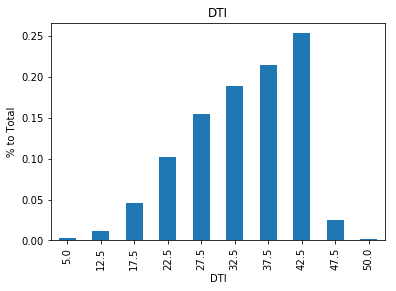

In [17]:
dti_distri = (df.groupby('dti_new').loan_id.nunique().sort_index())/df.loan_id.nunique()
dti_distri.plot(kind = 'bar', title = 'DTI').set(xlabel = 'DTI', ylabel = '% to Total')
plt.show()

**FICO**

In [18]:
((df.groupby('FICO_new').loan_id.nunique().sort_index())/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

FICO_new
630     0.5%
650     1.2%
670     2.2%
690     6.1%
710     8.3%
730    13.0%
750    17.2%
770    20.6%
790    20.9%
800     9.9%
Name: loan_id, dtype: object

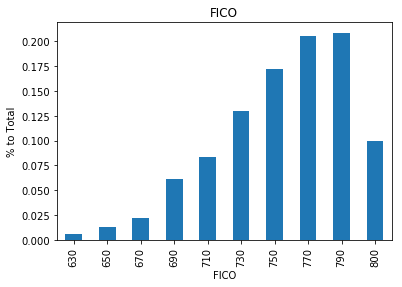

In [19]:
dti_distri2 = (df.groupby('FICO_new').loan_id.nunique().sort_index())/df.loan_id.nunique()
dti_distri2.plot(kind = 'bar', title = 'FICO').set(xlabel = 'FICO', ylabel = '% to Total')
plt.show()

**LTV**

In [20]:
((df.groupby('ltv_new').loan_id.nunique().sort_index())/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

ltv_new
85    15.6%
90    38.7%
95    43.5%
97     2.3%
Name: loan_id, dtype: object

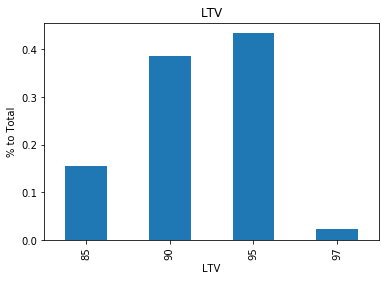

In [21]:
dti_distri2 = (df.groupby('ltv_new').loan_id.nunique().sort_index())/df.loan_id.nunique()
dti_distri2.plot(kind = 'bar', title = 'LTV').set(xlabel = 'LTV', ylabel = '% to Total')
plt.show()

**First Time Home-Buyer**

In [22]:
(df.groupby('fhb_flag').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

fhb_flag
N    68.3%
Y    31.7%
Name: loan_id, dtype: object

**Number of Borrowers**

In [23]:
(df.groupby('no_bor').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

no_bor
1    50.8%
2    49.2%
Name: loan_id, dtype: object

**Property Type Eligibility**

In [24]:
(df.groupby('prop_type_eligible').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

prop_type_eligible
0     0.3%
1    99.7%
Name: loan_id, dtype: object

**MI Channel**

In [25]:
(df.groupby('MI_chl').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

MI_chl
Delegated        66.7%
Non-Delegated    33.3%
Name: loan_id, dtype: object

**Ever Delinquent**

In [26]:
(df.groupby('Ever_Delinquent').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

Ever_Delinquent
0    97.5%
1     2.5%
Name: loan_id, dtype: object

In [27]:
df.groupby('Ever_Delinquent').loan_id.nunique()

Ever_Delinquent
0    469208
1     12010
Name: loan_id, dtype: int64

** Claim Flag**

In [28]:
(df.groupby('claim_flag').loan_id.nunique()/df.loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

claim_flag
0    99.8%
1     0.2%
Name: loan_id, dtype: object

**Due to unbalanced data, we will need to upsample or downsample one of the class. Here I chose to downsample never delinquent loans** 
 - Select 10,000 per group (Ever Delinquent)

In [29]:
df_new =df.groupby("Ever_Delinquent",as_index=False).apply(lambda x: x.sample(10000)).reset_index()

In [30]:
df_new.groupby('Ever_Delinquent').loan_id.nunique()

Ever_Delinquent
0    10000
1    10000
Name: loan_id, dtype: int64

In [31]:
df_new.head()

,level_0,level_1,loan_id,ory,orig_upb,loan_purp,prop_type,multi_unit,orig_chn,occ_stat,...,FICO_new,ltv_new,fhb_flag,no_bor,prop_type_eligible,MI_chl,dr_time_default,Ever_Delinquent,current_status,claim_flag
0,0,321222,83196150,2013,359600,N,SF,0,R,O,...,770,85,N,2,1,Delegated,NaN,0,17.Cancel,0
1,0,186563,83041371,2012,201600,P,SF,0,R,O,...,800,90,N,1,1,Non-Delegated,NaN,0,01.Current,0
2,0,118812,82961376,2011,341000,N,SF,0,R,O,...,770,95,Y,2,1,Non-Delegated,NaN,0,17.Cancel,0
3,0,75236,82908491,2011,297000,N,SF,0,R,O,...,790,90,Y,2,1,Non-Delegated,NaN,0,17.Cancel,0
4,0,37110,82858630,2010,202255,P,SF,0,R,O,...,690,95,N,1,1,Delegated,NaN,0,17.Cancel,0


### Selected Features
- **Loan Purpose**: loan_purp 
- **Property Type**: prop_type
- **Occupancy Status**: occ_stat
- **DTI**: dti_new
- **FICO**: FICO_new
- **LTV**: ltv_new
- **First Time Home Buyer Indicator**: fhb_flag
- **MI Channel**: MI_chl
- **Number of Borrower**: no_bor
- **Origination Year**: ory

### Target : Ever Delinquent (1/0)

In [32]:
#Create a new DataFrame to just include the independent variable and dependent variables
df1 = df_new[['loan_purp', 'prop_type', 'occ_stat', 'dti_new', 'FICO_new', 'ltv_new', 'fhb_flag', 'MI_chl',
              'no_bor','ory','Ever_Delinquent']]

In [33]:
type(df1)

pandas.core.frame.DataFrame

In [34]:
df1.reset_index().head()

,index,loan_purp,prop_type,occ_stat,dti_new,FICO_new,ltv_new,fhb_flag,MI_chl,no_bor,ory,Ever_Delinquent
0,0,N,SF,O,32.5,770,85,N,Delegated,2,2013,0
1,1,P,SF,O,37.5,800,90,N,Non-Delegated,1,2012,0
2,2,N,SF,O,37.5,770,95,Y,Non-Delegated,2,2011,0
3,3,N,SF,O,37.5,790,90,Y,Non-Delegated,2,2011,0
4,4,P,SF,O,27.5,690,95,N,Delegated,1,2010,0


Split table into "target" vs. "features"

In [35]:
X = df1.iloc[:,0:10].values
y = df1.iloc[:,-1].values

**Encode Categorical Columns**
- Use LabelEncoder to transform categorical columns to numeric value, and then use OneHotEncoder to get dummy variable
- Create dummy variables for fields which have more than 2 values

In [36]:
X

array([['N', 'SF', 'O', ..., 'Delegated', 2, 2013],
       ['P', 'SF', 'O', ..., 'Non-Delegated', 1, 2012],
       ['N', 'SF', 'O', ..., 'Non-Delegated', 2, 2011],
       ..., 
       ['P', 'SF', 'O', ..., 'Delegated', 2, 2012],
       ['P', 'SF', 'S', ..., 'Delegated', 1, 2012],
       ['P', 'SF', 'O', ..., 'Delegated', 1, 2013]], dtype=object)

In [37]:
df_X = pd.DataFrame(X, columns =['loan_purp', 'prop_type', 'occ_stat', 'dti_new', 'FICO_new', 'ltv_new', 'fhb_flag', 'MI_chl', 
             'no_bor','ory'])

In [38]:
# Create a set of dummy variables from the categorical variables
df_X_dummy = pd.get_dummies(df_X[['loan_purp', 'prop_type', 'occ_stat', 'dti_new', 'FICO_new', 'ltv_new', 'fhb_flag', 'MI_chl', 
             'no_bor','ory']]).astype(np.int64)

In [39]:
df_X_dummy.shape

(20000, 43)

In [40]:
# Join the dummy variables to the main dataframe
df_X_new = pd.concat([df_X, df_X_dummy], axis=1)
df_X_new.head()

,loan_purp,prop_type,occ_stat,dti_new,FICO_new,ltv_new,fhb_flag,MI_chl,no_bor,ory,...,fhb_flag_N,fhb_flag_Y,MI_chl_Delegated,MI_chl_Non-Delegated,no_bor_1,no_bor_2,ory_2010,ory_2011,ory_2012,ory_2013
0,N,SF,O,32.5,770,85,N,Delegated,2,2013,...,1,0,1,0,0,1,0,0,0,1
1,P,SF,O,37.5,800,90,N,Non-Delegated,1,2012,...,1,0,0,1,1,0,0,0,1,0
2,N,SF,O,37.5,770,95,Y,Non-Delegated,2,2011,...,0,1,0,1,0,1,0,1,0,0
3,N,SF,O,37.5,790,90,Y,Non-Delegated,2,2011,...,0,1,0,1,0,1,0,1,0,0
4,P,SF,O,27.5,690,95,N,Delegated,1,2010,...,1,0,1,0,1,0,1,0,0,0


In [41]:
df_X_new.shape

(20000, 53)

In [42]:
#Drop non original categorical columns
df_X_new = df_X_new.drop(df_X_new.columns[[0, 1,2,3,4,5,6,7,8,9]], axis=1)  

In [43]:
df_X_new.head()

,loan_purp_C,loan_purp_N,loan_purp_P,prop_type_CO,prop_type_MH,prop_type_SF,occ_stat_I,occ_stat_O,occ_stat_S,dti_new_5.0,...,fhb_flag_N,fhb_flag_Y,MI_chl_Delegated,MI_chl_Non-Delegated,no_bor_1,no_bor_2,ory_2010,ory_2011,ory_2012,ory_2013
0,0,1,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
1,0,0,1,0,0,1,0,1,0,0,...,1,0,0,1,1,0,0,0,1,0
2,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
3,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
4,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,1,0,1,0,0,0


In [44]:
df_X_new.dtypes

loan_purp_C             int64
loan_purp_N             int64
loan_purp_P             int64
prop_type_CO            int64
prop_type_MH            int64
prop_type_SF            int64
occ_stat_I              int64
occ_stat_O              int64
occ_stat_S              int64
dti_new_5.0             int64
dti_new_12.5            int64
dti_new_17.5            int64
dti_new_22.5            int64
dti_new_27.5            int64
dti_new_32.5            int64
dti_new_37.5            int64
dti_new_42.5            int64
dti_new_47.5            int64
dti_new_50.0            int64
FICO_new_630            int64
FICO_new_650            int64
FICO_new_670            int64
FICO_new_690            int64
FICO_new_710            int64
FICO_new_730            int64
FICO_new_750            int64
FICO_new_770            int64
FICO_new_790            int64
FICO_new_800            int64
ltv_new_85              int64
ltv_new_90              int64
ltv_new_95              int64
ltv_new_97              int64
fhb_flag_N

In [45]:
# Drop redudant dummy variables
df_X_new = df_X_new.drop(df_X_new.columns[[0,4,6,9,19,29,33,35,37,39]], axis=1)

In [55]:
df_X_FICO = df_X_new[['FICO_new_650','FICO_new_670','FICO_new_690','FICO_new_710','FICO_new_730','FICO_new_750','FICO_new_770',
               'FICO_new_790','FICO_new_800']]

In [56]:
# Change the transformed dataframe to array
X = df_X_new.as_matrix()
X_FICO = df_X_FICO.as_matrix()

In [58]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_FICO_train, X_FICO_test, y_FICO_train, y_FICO_test = train_test_split(X_FICO, y, test_size = 0.2, random_state = 0)

**Creating Threshold Based on FICO Only Prediction**

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
classifier_t = LogisticRegression(random_state = 0)
classifier_t.fit(X_FICO_train, y_FICO_train)
y_FICO_pred = classifier_t.predict(X_FICO_test)
print(roc_auc_score(y_FICO_test, y_FICO_pred))

0.642610783497


In [60]:
from sklearn.model_selection import cross_val_score
accuracies0 = cross_val_score(estimator = classifier_t, X = X_FICO_train, y = y_FICO_train, cv = 10)
print(accuracies0.mean())
print(accuracies0.std())

0.65025121792
0.010680099076


** Algorithm 1 - Logistic Regression **

In [49]:
# Fitting Logistic Regression to the Training Set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
classifier.coef_ 

array([[-0.37830247, -0.42118904, -0.60419217, -0.38210939,  0.9864442 ,
         1.47454648,  0.01427938, -0.12698747,  0.04415844,  0.08441722,
         0.30047283,  0.48087235,  0.73635673,  0.84295272, -0.30597221,
         0.05979201, -0.2084888 , -0.9329735 , -1.22969181, -1.67025854,
        -1.98211808, -2.40129527, -2.75751685, -2.89273132,  0.1603125 ,
         0.45529655,  0.67354453, -0.14016723,  0.06569301, -0.83765259,
        -0.37412385, -0.76690889, -0.85204119]])

In [51]:
classifier.intercept_ 

array([ 1.9006102])

In [52]:
classifier.n_iter_

array([6], dtype=int32)

In [53]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [54]:
# Evaluate Prediction Results by using Confusion Metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1396,  598],
       [ 678, 1328]])

C:\Users\SunLix\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\SunLix\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\SunLix\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


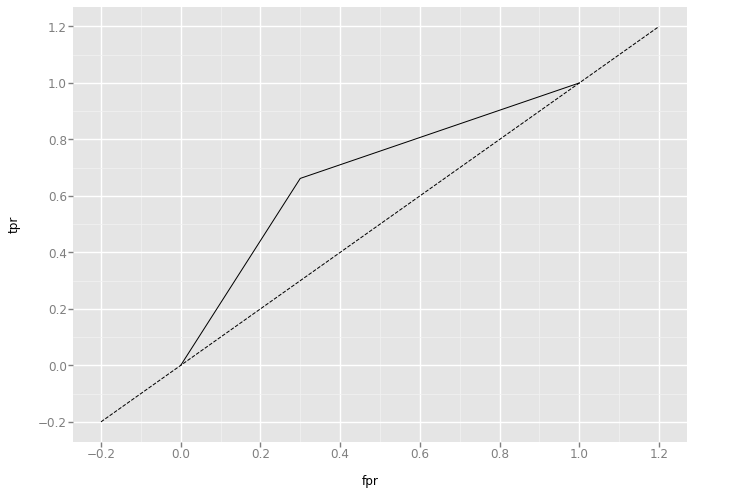

<ggplot: (193460937455)>

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from ggplot import *
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
df_eval = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df_eval, aes(x='fpr', y='tpr')) +\
      geom_line() +\
      geom_abline(linetype='dashed')

In [56]:
# Calculate AUC
print(auc(fpr, tpr))
print(roc_auc_score(y_test, y_pred))


0.681057129514
0.681057129514


In [57]:
# Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies1.mean()

0.68612388710894023

In [58]:
#variance
accuracies1.std()

0.013107884669360552

**Regularization using Lasso, Ridge or ElasticNet**

In [59]:
# get list of freature names
names = df_X_new.columns.values
names

array(['loan_purp_N', 'loan_purp_P', 'prop_type_CO', 'prop_type_SF',
       'occ_stat_O', 'occ_stat_S', 'dti_new_12.5', 'dti_new_17.5',
       'dti_new_22.5', 'dti_new_27.5', 'dti_new_32.5', 'dti_new_37.5',
       'dti_new_42.5', 'dti_new_47.5', 'dti_new_50.0', 'FICO_new_650',
       'FICO_new_670', 'FICO_new_690', 'FICO_new_710', 'FICO_new_730',
       'FICO_new_750', 'FICO_new_770', 'FICO_new_790', 'FICO_new_800',
       'ltv_new_90', 'ltv_new_95', 'ltv_new_97', 'fhb_flag_Y',
       'MI_chl_Non-Delegated', 'no_bor_2', 'ory_2011', 'ory_2012',
       'ory_2013'], dtype=object)

In [60]:
# Lasso Regression Regularization
from sklearn.linear_model import Lasso
# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df_reg = pd.DataFrame()

    # Create a column of feature names
    df_reg['Feature Name'] = names

    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)

        # Fit the lasso regression
        lasso.fit(X_train, y_train)

        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df_reg[column_name] = lasso.coef_

    # Return the datafram    
    return df_reg



In [61]:
# Run the function called, Lasso
lasso([1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20])

C:\Users\SunLix\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,Feature Name,Alpha = 0.000000,Alpha = 0.000100,Alpha = 0.001000,Alpha = 0.010000,Alpha = 1.000000,Alpha = 5.000000,Alpha = 10.000000,Alpha = 20.000000
0,loan_purp_N,-0.085336,-0.072768,-0.001067,-0.000000,-0.0,-0.0,-0.0,-0.0
1,loan_purp_P,-0.095358,-0.080908,-0.000000,0.000000,0.0,0.0,0.0,0.0
2,prop_type_CO,-0.176007,-0.114888,-0.036486,-0.000000,-0.0,-0.0,-0.0,-0.0
3,prop_type_SF,-0.130302,-0.069912,0.000000,0.000000,0.0,0.0,0.0,0.0
4,occ_stat_O,0.594688,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0
5,occ_stat_S,0.696226,0.097410,0.064594,0.000000,0.0,0.0,0.0,0.0
6,dti_new_12.5,0.008450,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0
7,dti_new_17.5,-0.016796,-0.031727,-0.047783,-0.000000,-0.0,-0.0,-0.0,-0.0
8,dti_new_22.5,0.012272,-0.005196,-0.038425,-0.000000,-0.0,-0.0,-0.0,-0.0
9,dti_new_27.5,0.018783,0.000000,-0.035831,-0.000000,-0.0,-0.0,-0.0,-0.0


In [62]:
# Ridge Regression Regularization
from sklearn.linear_model import Ridge
# Create a function called ridge,
def ridge(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df_reg2 = pd.DataFrame()

    # Create a column of feature names
    df_reg2['Feature Name'] = names

    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        ridge = Ridge(alpha=alpha)

        # Fit the lasso regression
        ridge.fit(X_train, y_train)

        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df_reg2[column_name] = ridge.coef_

    # Return the datafram    
    return df_reg2



In [63]:
# Run the function called, Ridge
ridge([1e-4, 1e-3,1e-2, 1, 5, 10, 20,40,80,100])

,Feature Name,Alpha = 0.000100,Alpha = 0.001000,Alpha = 0.010000,Alpha = 1.000000,Alpha = 5.000000,Alpha = 10.000000,Alpha = 20.000000,Alpha = 40.000000,Alpha = 80.000000,Alpha = 100.000000
0,loan_purp_N,-0.085317,-0.085316,-0.085311,-0.084595,-0.081682,-0.078368,-0.072614,-0.063523,-0.051093,-0.046654
1,loan_purp_P,-0.095386,-0.095384,-0.095372,-0.094237,-0.090380,-0.086118,-0.078818,-0.067385,-0.051618,-0.045856
2,prop_type_CO,-0.176026,-0.176021,-0.175968,-0.170530,-0.152074,-0.134561,-0.110626,-0.084074,-0.060638,-0.054428
3,prop_type_SF,-0.130314,-0.130309,-0.130257,-0.124854,-0.106463,-0.089010,-0.065159,-0.038725,-0.015523,-0.009447
4,occ_stat_O,0.763213,0.761745,0.747347,0.219953,0.023612,-0.010881,-0.028648,-0.036673,-0.038926,-0.038776
5,occ_stat_S,0.864761,0.863291,0.848876,0.320685,0.123063,0.087335,0.067485,0.056073,0.048492,0.046377
6,dti_new_12.5,0.009154,0.009142,0.009020,-0.001571,-0.020189,-0.028470,-0.034339,-0.036394,-0.033863,-0.032145
7,dti_new_17.5,-0.016086,-0.016099,-0.016220,-0.026762,-0.045567,-0.054431,-0.061725,-0.066545,-0.068015,-0.067622
8,dti_new_22.5,0.012974,0.012962,0.012840,0.002175,-0.017279,-0.026922,-0.035597,-0.042727,-0.047928,-0.049143
9,dti_new_27.5,0.019483,0.019471,0.019350,0.008732,-0.010577,-0.020096,-0.028628,-0.035670,-0.040998,-0.042334


In [64]:
# ElasticNet Regression Regularization
from sklearn.linear_model import ElasticNet
# Create a function called elasticnet,
def elasticnet(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df_reg3 = pd.DataFrame()

    # Create a column of feature names
    df_reg3['Feature Name'] = names

    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        elasticnet = ElasticNet(alpha=alpha)

        # Fit the lasso regression
        elasticnet.fit(X_train, y_train)

        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df_reg3[column_name] = elasticnet.coef_

    # Return the datafram    
    return df_reg3



In [65]:
# Run the function called, ElasticNet
elasticnet([1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20])

C:\Users\SunLix\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,Feature Name,Alpha = 0.000000,Alpha = 0.000100,Alpha = 0.001000,Alpha = 0.010000,Alpha = 1.000000,Alpha = 5.000000,Alpha = 10.000000,Alpha = 20.000000
0,loan_purp_N,-0.085337,-0.078487,-0.021766,-0.000000,-0.0,-0.0,-0.0,-0.0
1,loan_purp_P,-0.095358,-0.087285,-0.022365,0.000000,0.0,0.0,0.0,0.0
2,prop_type_CO,-0.176010,-0.142081,-0.041603,-0.000000,-0.0,-0.0,-0.0,-0.0
3,prop_type_SF,-0.130305,-0.096752,0.000000,0.000000,0.0,0.0,0.0,0.0
4,occ_stat_O,0.594752,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0
5,occ_stat_S,0.696290,0.099128,0.080396,0.000000,0.0,0.0,0.0,0.0
6,dti_new_12.5,0.008460,-0.004247,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0
7,dti_new_17.5,-0.016786,-0.033490,-0.047374,-0.000000,-0.0,-0.0,-0.0,-0.0
8,dti_new_22.5,0.012283,-0.005812,-0.029542,-0.004831,-0.0,-0.0,-0.0,-0.0
9,dti_new_27.5,0.018793,0.000000,-0.024874,-0.016616,-0.0,-0.0,-0.0,-0.0


In [66]:
# Return the possibility of "1" class
classifier.predict_proba(X_test)[:,1]

array([ 0.85776661,  0.2879734 ,  0.77087824, ...,  0.19782975,
        0.47722564,  0.2570081 ])

In [67]:
# Return the possibility of "0" class
classifier.predict_proba(X_test)[:,0]

array([ 0.14223339,  0.7120266 ,  0.22912176, ...,  0.80217025,
        0.52277436,  0.7429919 ])

In [68]:
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [89]:
# Return the possibility of "1" class to original dataset
y_hats = classifier.predict(X)
delinquent_proba = classifier.predict_proba(X)[:,1]
df1.loc[:,'y_hats'] = y_hats
df1.loc[:,'dlq_proba'] = delinquent_proba

C:\Users\SunLix\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [70]:
df1.head()

,loan_purp,prop_type,occ_stat,dti_new,FICO_new,ltv_new,fhb_flag,MI_chl,no_bor,ory,Ever_Delinquent,y_hats,dlq_proba
0,P,SF,O,22.5,750,90,N,Delegated,2,2012,0,0,0.214426
1,P,SF,O,42.5,690,97,Y,Delegated,1,2013,0,1,0.827566
2,P,SF,O,17.5,710,90,N,Delegated,2,2013,0,0,0.309533
3,P,SF,O,42.5,770,95,N,Delegated,2,2013,0,0,0.306703
4,P,SF,O,37.5,730,90,N,Delegated,2,2012,0,0,0.365892


** Algorithm 2 - SVM **

In [71]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = "linear", random_state = 0)
classifier2.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
y_pred2 = classifier2.predict(X_test)

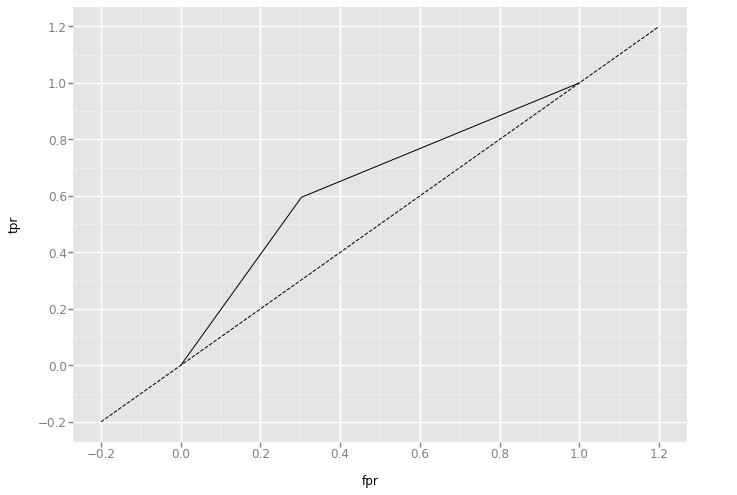

<ggplot: (-9223371843393327314)>

In [73]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)
df_eval2 = pd.DataFrame(dict(fpr=fpr2, tpr=tpr2))
ggplot(df_eval2, aes(x='fpr', y='tpr')) +\
      geom_line() +\
      geom_abline(linetype='dashed')

In [74]:
print(auc(fpr2, tpr2))
print(roc_auc_score(y_test, y_pred2))

0.646152815375
0.646152815375


In [75]:
# Applying K-Fold Cross Validation
accuracies2 = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print(accuracies2.mean())
print(accuracies2.std())

0.653062704443
0.00999413963387


**Algorithm 3 - Kernel SVM**

In [76]:
classifier3 = SVC(kernel = "poly", random_state = 0)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred3)
print(auc(fpr3, tpr3))
print(roc_auc_score(y_test, y_pred3))

0.668123263109
0.668123263109


In [77]:
# Applying K-Fold Cross Validation
accuracies3 = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
print(accuracies3.mean())
print(accuracies3.std())

0.672811734985
0.0138928590244


In [78]:
classifier4 = SVC(kernel = "rbf", random_state = 0)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred4)
print(auc(fpr4, tpr4))
print(roc_auc_score(y_test, y_pred4))

0.667015003135
0.667015003135


In [79]:
accuracies4 = cross_val_score(estimator = classifier4, X = X_train, y = y_train, cv = 10)
print(accuracies4.mean())
print(accuracies4.std())

0.668437240625
0.00917324869475


**Algorithm 4 - Random Forest**

In [80]:
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred5)
print(auc(fpr5, tpr5))
print(roc_auc_score(y_test, y_pred5))

0.61847556628
0.61847556628


In [81]:
accuracies5 = cross_val_score(estimator = classifier5, X = X_train, y = y_train, cv = 10)
print(accuracies5.mean())
print(accuracies5.std())

0.634936136572
0.00941296457722


**Algorithm 5 - Decision Tree**

In [82]:
from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred6)
print(auc(fpr6, tpr6))
print(roc_auc_score(y_test, y_pred6))

0.62109108982
0.62109108982


In [83]:
accuracies6 = cross_val_score(estimator = classifier6, X = X_train, y = y_train, cv = 10)
print(accuracies6.mean())
print(accuracies6.std())

0.623998007763
0.0102934859503


**Algorithm 6 - K-NN**

In [84]:
from sklearn.neighbors import KNeighborsClassifier
classifier7 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier7.fit(X_train, y_train)
y_pred7 = classifier7.predict(X_test)
fpr7, tpr7, thresholds7 = roc_curve(y_test, y_pred7)
print(auc(fpr7, tpr7))
print(roc_auc_score(y_test, y_pred7))

0.619959079632
0.619959079632


In [85]:
accuracies7 = cross_val_score(estimator = classifier7, X = X_train, y = y_train, cv = 10)
print(accuracies7.mean())
print(accuracies7.std())

0.631311487378
0.0117967246502


### Find out the possibility of loan in claim with the ever deliquent status

In [86]:
df2 = df[['loan_id','Ever_Delinquent', 'claim_flag']]

In [87]:
((df2[df2['claim_flag']==1].groupby('Ever_Delinquent').loan_id.nunique())/df2.groupby('Ever_Delinquent').loan_id.nunique())\
.mul(100).round(1).astype(str) + '%'

Ever_Delinquent
0    nan%
1    8.4%
Name: loan_id, dtype: object

### Including Regularization to the Logistic Regression

In [158]:
l1_penalty = [0, 0.1, 0.5, 1, 2, 5, 10, 20, 30, 50,60, 80,90,100]

for penalty in l1_penalty:
    lr = LogisticRegression(penalty = 'l1', C = l1_penalty)
lr.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [159]:
y_pred = lr.predict(X_test)
roc_auc_score(y_test, y_pred)

0.68030937278435499

In [97]:
# Fitting Logistic Regression with Regularization to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l1', C = 100,random_state = 0)
classifier.fit(X_train, y_train)
# Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies1.mean()

0.6853116602779924

In [98]:
# Fitting Logistic Regression with Regularization to the Training Set
classifier = LogisticRegression(penalty = 'l1', C = 10,random_state = 0)
classifier.fit(X_train, y_train)
# Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies1.mean()

0.68518646494100188

In [99]:
# Fitting Logistic Regression with Regularization to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l2', C =10,random_state = 0)
classifier.fit(X_train, y_train)
# Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies1.mean()

0.68531158215296184

In [102]:
# Fitting Logistic Regression with Regularization to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l2', C =100,random_state = 0)
classifier.fit(X_train, y_train)
# Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies1.mean()

0.68537408215296181

In [103]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [115]:
# Return the possibility of "1" class to training set and test set
y_hats_train = classifier.predict(X_train)
delinquent_proba_train = classifier.predict_proba(X_train)[:,1]
df_train = pd.DataFrame(X_train)
df_train.loc[:,'y_actual'] = y_train
df_train.loc[:,'y_hats'] = y_hats_train
df_train.loc[:,'delinquent_proba'] = delinquent_proba_train

In [116]:
y_hats_test = classifier.predict(X_test)
delinquent_proba_test = classifier.predict_proba(X_test)[:,1]
df_test = pd.DataFrame(X_test)
df_test.loc[:,'y_actual'] = y_test
df_test.loc[:,'y_hats'] = y_hats_test
df_test.loc[:,'delinquent_proba'] = delinquent_proba_test

In [117]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,y_actual,y_hats,delinquent_proba
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0.420291
1,0,1,0,1,1,0,0,0,0,0,...,0,1,1,0,0,0,1,1,1,0.661609
2,0,1,0,1,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0.701390
3,0,1,0,1,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,1,0.829892
4,0,1,0,1,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0.303886


y_hats
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: delinquent_proba, dtype: object

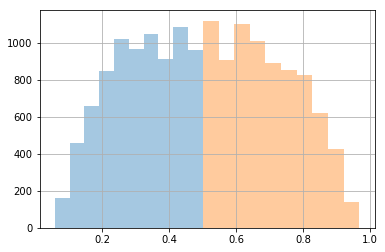

In [121]:
df_train.groupby("y_hats").delinquent_proba.hist(alpha=0.4)

y_hats
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: delinquent_proba, dtype: object

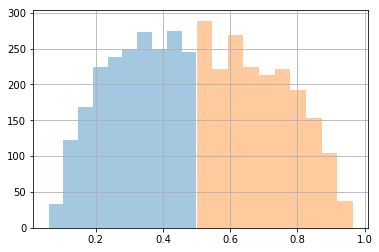

In [122]:
df_test.groupby("y_hats").delinquent_proba.hist(alpha=0.4)

y_actual
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: delinquent_proba, dtype: object

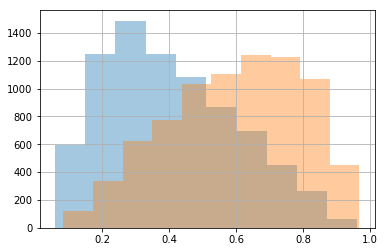

In [123]:
df_train.groupby("y_actual").delinquent_proba.hist(alpha=0.4)

y_actual
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: delinquent_proba, dtype: object

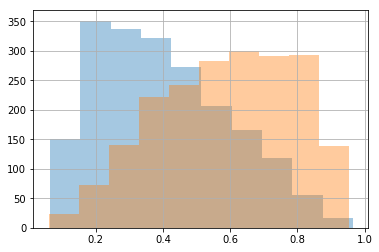

In [124]:
df_test.groupby("y_actual").delinquent_proba.hist(alpha=0.4)

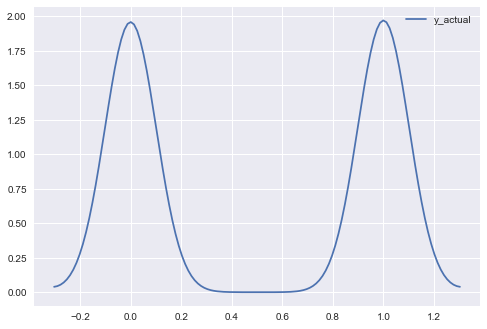

In [163]:
import seaborn as sns
sns.kdeplot(df_test.y_actual)  